#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/Task (1) Dataset.csv')

In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            12

### Handle Missing Values

In [72]:
df['Educational_level'].isnull().sum() # we can take the mode

741

In [73]:
mode_edu_level = df['Educational_level'].mode()
mode_edu_level

0    Junior high school
Name: Educational_level, dtype: object

In [98]:
df['Educational_level'].fillna(mode_edu_level[0] , inplace=True)

--------------------------

In [75]:
df['Vehicle_driver_relation'].isnull().sum() # mode

579

In [29]:
mode_driver_relation = df['Vehicle_driver_relation'].mode()
mode_driver_relation

0    Employee
Name: Vehicle_driver_relation, dtype: object

In [99]:
df['Vehicle_driver_relation'].fillna(mode_driver_relation[0] , inplace=True)

---------------------------------------

In [77]:
df['Driving_experience'].isnull().sum() # fill with unknown

829

In [100]:
df['Driving_experience'].fillna('Unknown' , inplace=True)

----------------------------

In [79]:
df['Type_of_vehicle'].isnull().sum()

950

In [101]:
df['Type_of_vehicle'].fillna('Unknown' , inplace=True)

In [35]:
df['Type_of_vehicle'].value_counts() # fill with unknown

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

-----------------------------------------------

In [81]:
df['Owner_of_vehicle'].isnull().sum()

482

In [39]:
df['Owner_of_vehicle'].value_counts() # fill with mode

Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64

In [102]:
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0] , inplace=True)

-------------------------------------------------------------

In [83]:
df['Service_year_of_vehicle'].isnull().sum() # a lot of 'unknown' and missing values , so i will drop the column

3928

In [41]:
df['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64

In [103]:
df.drop('Service_year_of_vehicle' , axis=1 , inplace=True)

---------------------------------------------------

In [85]:
df['Defect_of_vehicle'].isnull().sum() # fill it with mode

4427

In [44]:
df['Defect_of_vehicle'].value_counts()

Defect_of_vehicle
No defect    7777
7              76
5              36
Name: count, dtype: int64

In [104]:
df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0] , inplace=True)

----------------------------------------------

In [87]:
df['Area_accident_occured'].isnull().sum() # few number of missing , we can delete it

239

In [105]:
df['Area_accident_occured'].dropna(inplace=True)

------------------------------------------------------

In [16]:
df['Lanes_or_Medians'].isnull().sum() # fill it with unknown

385

In [49]:
df['Lanes_or_Medians'].value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64

In [106]:
df['Lanes_or_Medians'].fillna('Unknown' , inplace=True)

---------------------------------------------------

In [62]:
df['Road_allignment'].isnull().sum() # few number of missing , we can delete it

142

In [92]:
df['Road_allignment'].dropna(inplace=True)

----------------------------------------------------

In [18]:
df['Types_of_Junction'].isnull().sum() # fill it with unknown

887

In [54]:
df['Types_of_Junction'].value_counts()

Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

In [107]:
df['Types_of_Junction'].fillna('Unknown' , inplace=True)

-----------------------------------------------

In [20]:
df['Type_of_collision'].isnull().sum() # few number of missing , we can delete it

155

In [108]:
df['Type_of_collision'].dropna(inplace=True)

--------------------------------------

In [21]:
df['Vehicle_movement'].isnull().sum() # fill it with unknown

308

In [57]:
df['Vehicle_movement'].value_counts()

Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64

In [109]:
df['Vehicle_movement'].fillna('Unknown' , inplace=True)

-------------------------------------

In [22]:
df['Work_of_casuality'].isnull().sum() # unnecessary column , i will drop it

3198

In [110]:
df.drop('Work_of_casuality' , axis=1 , inplace=True)

---------------------------------------------

In [23]:
df['Fitness_of_casuality'].isnull().sum()# unnecessary column , i will drop it

2635

In [111]:
df.drop('Fitness_of_casuality' , axis=1 , inplace=True)

-------------------------------------------------

### Correct any inconsistent data entries.

### Ensure data types are appropriate for each column.

---



In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            12316 non-null  object        
 5   Vehicle_driver_relation      12316 non-null  object        
 6   Driving_experience           12316 non-null  object        
 7   Type_of_vehicle              12316 non-null  object        
 8   Owner_of_vehicle             12316 non-null  object        
 9   Defect_of_vehicle            12316 non-null  object        
 10  Area_accident_occured        12077 non-null  object        
 11  Lanes_or_Medians             12316 non-nu

In [125]:
# change the type of time column to datetime
df['Time'] = pd.to_datetime(df['Time'])

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [127]:
df.sample(30)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
909,2024-07-25 07:25:00,Friday,31-50,Male,Writing & reading,Owner,5-10yr,Motorcycle,Owner,No defect,...,2,1,Going straight,Driver or rider,Female,31-50,3,Not a Pedestrian,Overtaking,Serious Injury
9724,2024-07-25 18:30:00,Wednesday,31-50,Male,High school,Owner,5-10yr,Automobile,Owner,No defect,...,2,1,Reversing,Driver or rider,Male,31-50,3,Not a Pedestrian,No distancing,Slight Injury
8829,2024-07-25 09:35:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Unknown,Owner,No defect,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Driving carelessly,Slight Injury
2418,2024-07-25 09:10:00,Friday,31-50,Male,Elementary school,Employee,5-10yr,Automobile,Owner,No defect,...,2,1,Reversing,Pedestrian,Male,Over 51,3,Crossing from offside - masked by parked or s...,No distancing,Slight Injury
6418,2024-07-25 18:48:00,Monday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,No defect,...,4,5,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
6108,2024-07-25 19:00:00,Friday,Unknown,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,No defect,...,3,3,Other,Driver or rider,Male,Over 51,3,Not a Pedestrian,Moving Backward,Slight Injury
8366,2024-07-25 09:52:00,Friday,Over 51,Male,Junior high school,Employee,2-5yr,Public (12 seats),Owner,No defect,...,2,2,Going straight,Passenger,Male,31-50,3,Not a Pedestrian,No priority to vehicle,Serious Injury
7312,2024-07-25 12:30:00,Saturday,Unknown,Male,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,No defect,...,2,1,Going straight,Pedestrian,Male,31-50,3,Not a Pedestrian,Driving to the left,Slight Injury
653,2024-07-25 21:15:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Stationwagen,Owner,No defect,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Fatal injury
8861,2024-07-25 02:59:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Organization,No defect,...,2,1,Going straight,Pedestrian,Male,31-50,3,Not a Pedestrian,No distancing,Slight Injury


In [126]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties
count,12316,12316.000000,12316.000000
mean,2024-07-25 14:17:50.768106496,2.040679,1.548149
min,2024-07-25 00:01:00,1.000000,1.000000
25%,2024-07-25 10:31:00,2.000000,1.000000
50%,2024-07-25 15:10:00,2.000000,1.000000
75%,2024-07-25 18:10:00,2.000000,2.000000
max,2024-07-25 23:59:00,7.000000,8.000000
std,NaN,0.688790,1.007179


In [135]:
correlations_columns= df[['Number_of_vehicles_involved' , 'Number_of_casualties']]

corr_tabel = correlations_columns.corr()
corr_tabel

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


### Identify and analyze patterns in the data.

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

<Axes: ylabel='Age_band_of_driver'>

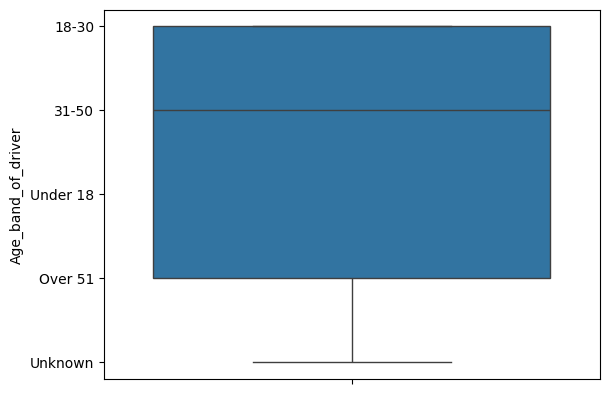

In [131]:
sns.boxplot(df['Age_band_of_driver'])

<Axes: ylabel='Type_of_vehicle'>

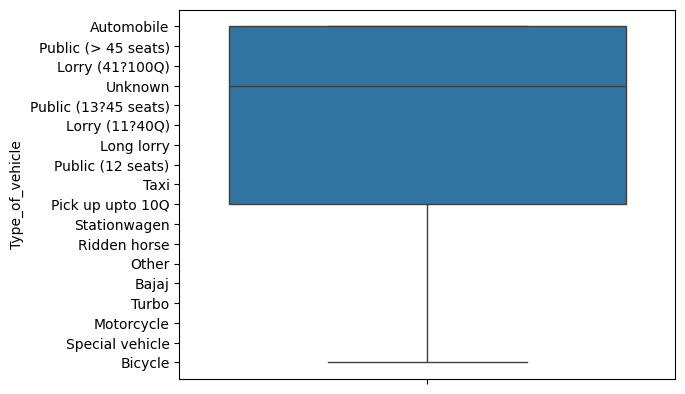

In [133]:
sns.boxplot(df['Type_of_vehicle'])

In [137]:
df['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

## first figure


<Axes: ylabel='Frequency'>

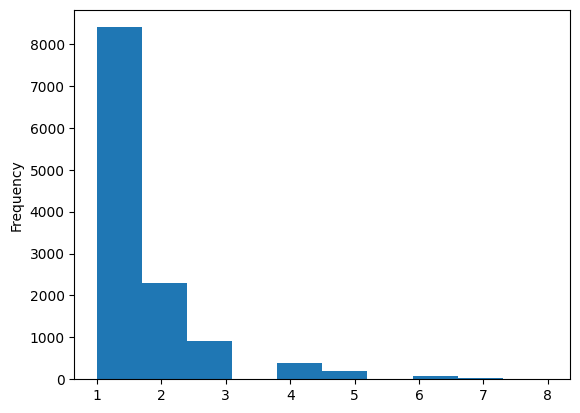

In [138]:
#Distribution of the number of casualties
df['Number_of_casualties'].plot.hist()


# The figure shows the distribution of the number of casualties, and we notice that the number of casualties is usually 1.

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


## figure2

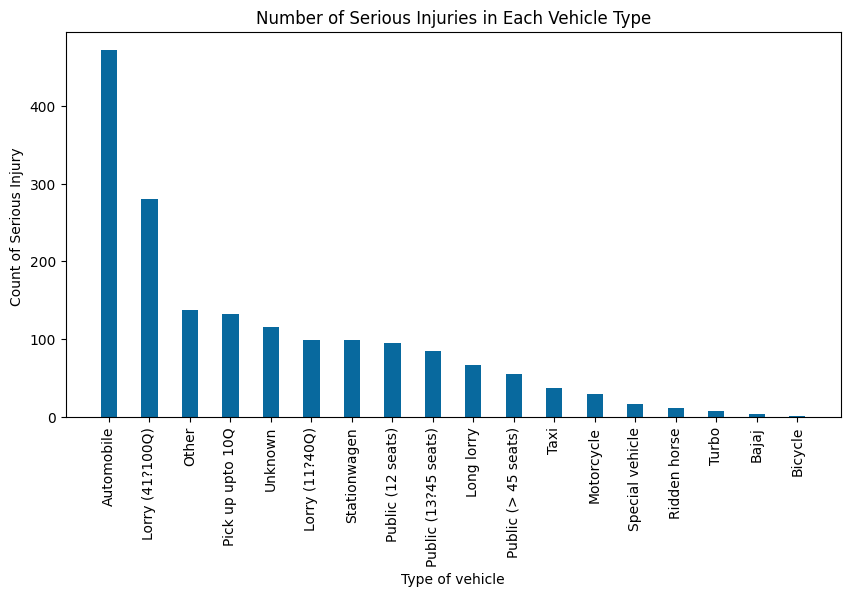

In [184]:
#Serious injury occurs more frequently with witch type of vehicle?
filtered_df = df[df['Accident_severity'] == 'Serious Injury']


result2 = filtered_df['Type_of_vehicle'].value_counts()
result2  = pd.DataFrame(result2)
result2


fig = plt.figure(figsize = (10, 5))

plt.bar(result2.index, result2['count'], color ='#08699E',
        width = 0.4)
plt.xlabel("Type of vehicle")
plt.ylabel("Count of Serious Injury ")
plt.title("Number of Serious Injuries in Each Vehicle Type")
plt.xticks(rotation=90)
plt.show()

# We want to know the number of serious injuries in each type of vehicle.
#  Is there a specific type of vehicle in which Injury are often more serious when an accident occurs?


In [175]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', 'Unknown',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

## figure 3

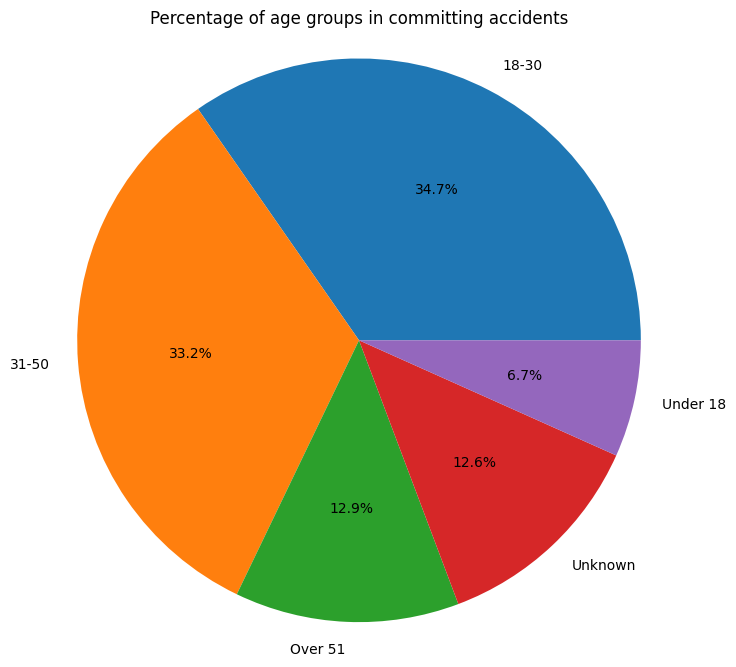

In [172]:
#Percentage of age groups in committing accidents


ages= df['Age_band_of_driver'].value_counts()
ages = pd.DataFrame(ages)
ages.rename(columns={'Age_band_of_driver':'count'},inplace=True)


total = len(df)
ages['percentage'] = (ages['count']/total)*100

plt.figure(figsize=(8, 8))
plt.pie(ages['percentage'], labels=ages.index, autopct='%1.1f%%')
plt.title('Percentage of age groups in committing accidents')
plt.axis('equal')
plt.show()

# The pie Chart showed that the age group that most commits accidents is between 18-30 years old.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

figure 1- The first diagram shows the distribution of the number of casualties, and we notice that the number of casualties is usually 1.


figure 2- We want to know the number of serious injuries in each type of vehicle. Is there a specific type of vehicle in which Injury are often more serious when an accident occurs?


figure 3- What is the age group that most commits accidents? The pie Chart showed that the age group that most commits accidents is between 18-30 years old.